## Tests each model 5x (5-fold) on separate train/test splits, returns average performances
#### Hyperparameters are taken from inner CV from other notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Train_call.txt',delimiter = '\t')
labels = pd.read_csv('Train_clinical.txt',delimiter = '\t')

In [3]:
data = data.transpose()
#data = data[4:]
data = data.reset_index()
data.rename(columns={'index':'Sample'}, inplace=True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Chromosome,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
1,Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
2,End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
3,Nclone,3,4,4,5,13,96,45,4,104,...,159,20,6,64,5,57,4,55,5,43
4,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1


In [4]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [5]:
# Combine labels and instances
combined = pd.merge(data,labels,on='Sample',)
combined

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

In [7]:
X = combined.iloc[:,1:2835]
y = combined['Subgroup']

combined.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (80, 2834)
X_test (20, 2834)
y_train (80,)
y_test (20,)


In [9]:
# label encode y_train for all models

from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y_train = lc.transform(y_train)

# transform lc_y_train into series
lc_y_train = pd.Series(lc_y_train)

In [10]:
# label encode y_test
lc1 = lc.fit(y_test) 
lc_y_test = lc1.transform(y_test)

# transform lc_y_test into series
lc_y_test = pd.Series(lc_y_test)

## Mutual Information

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [12]:
mi_score = mutual_info_classif(X_train,y_train, random_state=100)

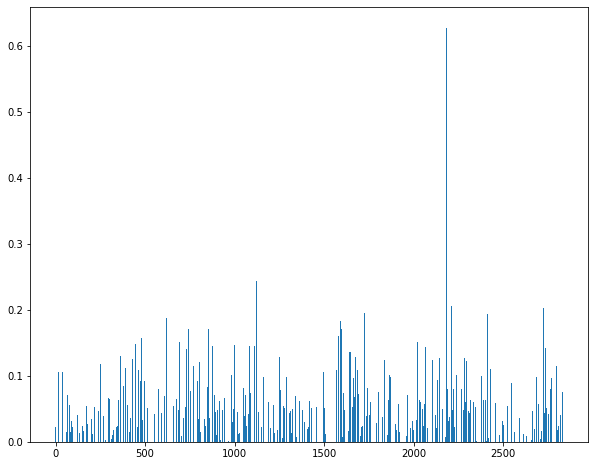

In [13]:
figure(figsize=(10,8))
pyplot.bar([i for i in range(len(mi_score))], mi_score)
pyplot.show()

In [14]:
# calculate the mean score
fs_mutinfo_all_df = pd.DataFrame(mi_score)
fs_mutinfo_all_df.rename(columns={0:'Scores'}, inplace=True)
mean_mutinfo = fs_mutinfo_all_df['Scores'].mean()
print('Mean score of mutual information:', mean_mutinfo)

# select features higher or equal to the mean
fs_mutinfo = fs_mutinfo_all_df.loc[fs_mutinfo_all_df['Scores'] >= 0.18]
print(len(fs_mutinfo))

Mean score of mutual information: 0.035446006441603464
33


In [15]:
selected_features_list= list(fs_mutinfo.T.columns)

### Filtering out features from ENTIRE dataset

In [16]:
data_mi = combined.filter(items=selected_features_list, axis=1)
data_mi.head()
print(len(data_mi))

100


In [17]:
data_mi['Subgroup'] = y

In [18]:
y = data_mi['Subgroup']
X = data_mi.drop('Subgroup',axis = 1)

In [19]:
#Label Encode y
lc = LabelEncoder() 
lc = lc.fit(y) 
y = lc.transform(y)
y = pd.Series(y)


## outer_CV splits data into 5 training/test sets and runs a model on each, returning average accuracy

In [20]:
from sklearn.metrics import accuracy_score
import copy


def outer_CV(model, X, y):
    
    
    avg_model_accuracy = 0
    
    k = 5
    for i in reversed(range(0,k)):   
        if i == 5:
            #training range
            x_train = X.drop(labels = range(80,100), axis = 0)
            y_train = y.drop(labels = range(80,100), axis = 0)
            #testing range
            x_test = X[80:100]
            y_test = y[80:100]
        else:
            #training range
            x_train = X.drop(labels = range(0+i*20,20+i*20), axis = 0)
            y_train = y.drop(labels = range(0+i*20,20+i*20), axis = 0)
            #testing range
            x_test = X[0+i*20:20+i*20]
            y_test = y[0+i*20:20+i*20]
        
        #fit the given model to current fold
        
        model = model.fit(x_train, y_train)
        
        #make predictions
        preds = model.predict(x_test)
        
        #evaluate model
        accuracy = accuracy_score(preds, y_test)
        print(f"Accuracy on fold #{k} is: {accuracy}\n")
        avg_model_accuracy += accuracy*100
        
    #Print average accuracy
    avg_model_accuracy = avg_model_accuracy/5
    print(f"Average model accuracy over {k} folds is: {avg_model_accuracy}%")

## XGBoost 

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier() 

params = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'enable_categorical': False,
 'gamma': 0.4,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_class': 3,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


In [22]:
model = XGBClassifier(**params)
outer_CV(model, X, y)

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-package

[18:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on fold #5 is: 0.95

[18:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on fold #5 is: 0.95

[18:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on fold #5 is: 0.9

[18:37:57] WARNING: /Users/runner/work/xgboost/xgboost/s

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

params = {'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
modeln = RandomForestClassifier(**params)
outer_CV(modeln, X, y)

Accuracy on fold #5 is: 0.85

Accuracy on fold #5 is: 0.85

Accuracy on fold #5 is: 0.85

Accuracy on fold #5 is: 0.7

Accuracy on fold #5 is: 0.6

Average model accuracy over 5 folds is: 77.0%


## Logistic Regression

In [24]:
params = {'C': 0.03359818286283781}
model = LogisticRegression(**params)
outer_CV(model, X, y)

Accuracy on fold #5 is: 0.9

Accuracy on fold #5 is: 0.9

Accuracy on fold #5 is: 0.85

Accuracy on fold #5 is: 0.85

Accuracy on fold #5 is: 0.75

Average model accuracy over 5 folds is: 85.0%


### Outer CV using Sklearn's cross_validate()

In [25]:
from sklearn.metrics import make_scorer, precision_score, recall_score,f1_score

scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1': make_scorer(f1_score, average='macro'),
           'log_loss': 'neg_log_loss'
           }

In [26]:
from sklearn.model_selection import cross_validate

def average_score_on_cross_val_classification(clf, X, y, scoring=scoring, cv=5):
    """
    Evaluates a given model/estimator using cross-validation
    and returns a dict containing the absolute vlues of the average (mean) scores
    for classification models.

    clf: scikit-learn classification model
    X: features (no labels)
    y: labels
    scoring: a dictionary of scoring metrics
    cv: cross-validation strategy
    """
    # Score metrics on cross-validated dataset
    scores_dict = cross_validate(clf, X, y, scoring=scoring, cv=5, n_jobs=-1)

    # return the average scores for each metric
    return {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}



## XGBoost 

In [27]:
params = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'enable_categorical': False,
 'gamma': 0.4,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_class': 3,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}
model = XGBClassifier(**params)
average_score_on_cross_val_classification(model, X, y)

{'fit_time': 0.40389,
 'score_time': 0.05013,
 'test_accuracy': 0.86,
 'test_precision': 0.86136,
 'test_recall': 0.85357,
 'test_f1': 0.84585,
 'test_log_loss': -0.41661}

## Random Forest

In [28]:
params = {'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
model = RandomForestClassifier(**params)
average_score_on_cross_val_classification(model, X, y)

{'fit_time': 0.04529,
 'score_time': 0.02262,
 'test_accuracy': 0.82,
 'test_precision': 0.82327,
 'test_recall': 0.81508,
 'test_f1': 0.80686,
 'test_log_loss': -0.61875}

## Logistic Regression

In [29]:
params = {'C': 0.03359818286283781}
model = LogisticRegression(**params)
average_score_on_cross_val_classification(model, X, y)

{'fit_time': 0.02747,
 'score_time': 0.01442,
 'test_accuracy': 0.87,
 'test_precision': 0.89076,
 'test_recall': 0.8631,
 'test_f1': 0.85662,
 'test_log_loss': -0.63189}